<a href="https://colab.research.google.com/github/madilima/keras-tensorflow/blob/main/Aula7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [12]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [13]:

len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)

identificacoes_treino.min()
identificacoes_treino.max()

9

Exibir os dados

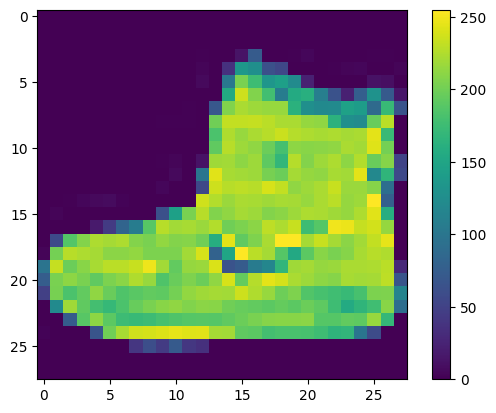

In [14]:

total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()


Normalizando as imagens


In [15]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo


In [16]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5278 - accuracy: 0.8128 - val_loss: 0.4194 - val_accuracy: 0.8474
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3989 - accuracy: 0.8550 - val_loss: 0.3760 - val_accuracy: 0.8614
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3616 - accuracy: 0.8686 - val_loss: 0.3591 - val_accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3391 - accuracy: 0.8751 - val_loss: 0.3424 - val_accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3227 - accuracy: 0.8794 - val_loss: 0.3476 - val_accuracy: 0.8785


Salvando e carregando o modelo treinado


In [18]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época


In [ ]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

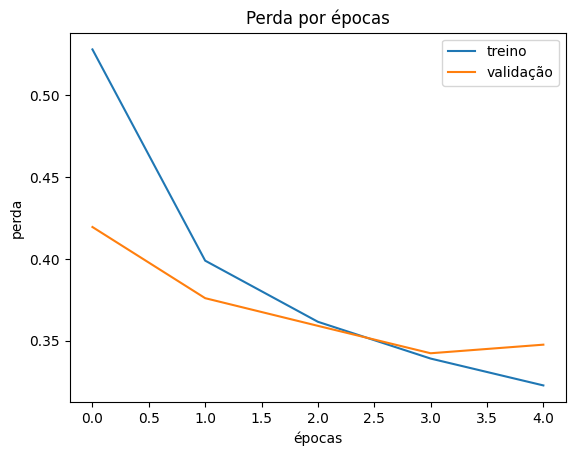

In [21]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [22]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo


In [23]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 67.7420 - accuracy: 0.8532
Perda do teste: 67.7419662475586
Acurácia do teste: 0.8532000184059143
